In [1]:
import numpy as np
import time
import tensorflow as tf
import pandas as pd

# importing for trace stack
import traceback

# include fot logging
import pandas as pd
log_df = pd.DataFrame(columns={'Iteration', 'training_RMSE', 'Cor_train','test_RMSE', 'Cor_is'})



/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [23]:
log_df = pd.DataFrame(columns={'Iteration', 'training_RMSE', 'Cor_train','test_RMSE', 'Cor_is'})


#### Read the dataset from the file
# BigX = np.load('./soyabean_samples_npz.npz')
BigX = np.load("./../../soyabean_fianl_npz.npz")
# Data Format order W(52*6) S(6*10) P(16)
X = BigX['data']

# Traning data consider as till 2017, testing would be 2018
X_tr = X[X[:, 1]<=2017]

# Remove the first three columns, loc_ID, year, yield
X_tr = X_tr[:, 3:]



### Plot the different type of graph to visualize the data

Example

In [25]:
# ## Example shwoing the imshow

# import numpy as np
# import matplotlib.pyplot as plt

# # Create a random 2D array for demonstration
# array = np.random.rand(10, 10)

# # Find the minimum and maximum values
# min_val = np.min(array)
# max_val = np.max(array)

# print("Minimum value:", min_val)
# print("Maximum value:", max_val)

# # Plot the array
# plt.imshow(array, cmap='viridis', origin='lower')
# plt.colorbar(label='Value')
# plt.title('2D Array')
# plt.show()


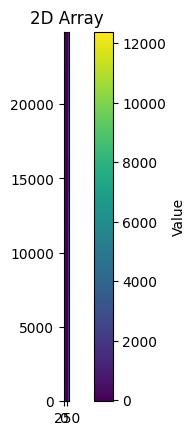

In [26]:
# Plot the graph to see the distribution of values
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_tr, cmap='viridis', origin='lower')
plt.colorbar(label='Value')
plt.title('2D Array')
plt.show()


#### Data Preprocessing
Subract Mean and divide by standerd deviation

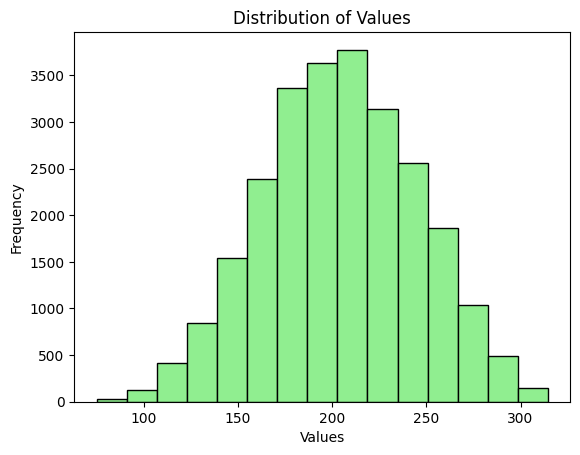

In [27]:
# Create a histogram for specific column.

plt.hist(X[:, 100], color='lightgreen', ec='black', bins=15)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Values")
plt.show()

Plot the Graph for the min and max values

In [28]:
import numpy as np

print("X_tr shape", X_tr.shape)

min_values = np.min(X_tr, axis=0)
print("min values shape :", min_values.shape)
max_values = np.max(X_tr, axis=0)
print("max values shape :", max_values.shape)

X_tr shape (24873, 392)
min values shape : (392,)
max values shape : (392,)


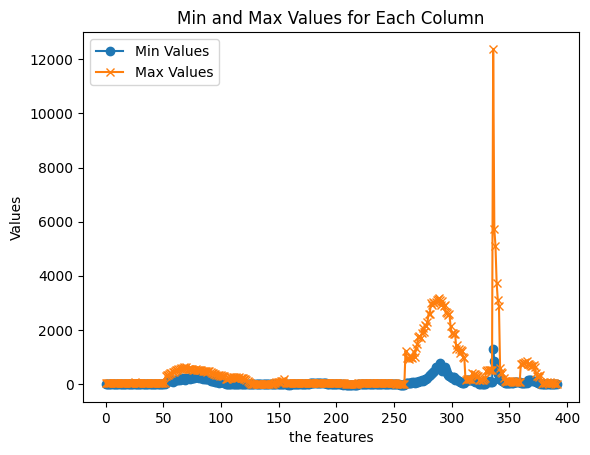

In [29]:
import matplotlib.pyplot as plt

# Assuming you have 300 columns
column_indices = np.arange(min_values.shape[0])

# Create a line plot
plt.plot(column_indices, min_values, label='Min Values', marker='o')
plt.plot(column_indices, max_values, label='Max Values', marker='x')

# Customize the plot
plt.xlabel('the features')
plt.ylabel('Values')
plt.title('Min and Max Values for Each Column')
plt.legend()

# Show the plot
plt.show()


All the weather features line graph of min and max values

min values shape : (52,)
max values shape : (52,)


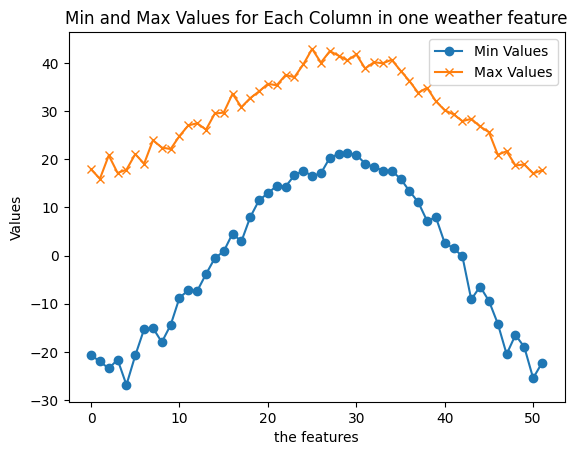

In [30]:
# print the one weather variable min and max values shape
weather_index = 4

min_values = np.min(X_tr[:, (weather_index-1)*52:weather_index*52], axis=0)
print("min values shape :", min_values.shape)
max_values = np.max(X_tr[:, (weather_index-1)*52:weather_index*52], axis=0)
print("max values shape :", max_values.shape)


# Assuming you have n columns
column_indices = np.arange(min_values.shape[0])

# Create a line plot
plt.plot(column_indices, min_values, label='Min Values', marker='o')
plt.plot(column_indices, max_values, label='Max Values', marker='x')

# Customize the plot
plt.xlabel('the features')
plt.ylabel('Values')
plt.title('Min and Max Values for Each Column in one weather feature')
plt.legend()

# Show the plot
plt.show()



Lets Put all the six weather graph in single plot.


In [31]:
def plot_the_weather_graph(X_tr, ax, x, y, weather_index):
    # Find the min and max values of variables
    min_values = np.min(X_tr[:, (weather_index-1)*52:weather_index*52], axis=0)
    print(f"weather Index:{weather_index}, min values shape :{min_values.shape}")
    max_values = np.max(X_tr[:, (weather_index-1)*52:weather_index*52], axis=0)
    print(f" weather Index:{weather_index}, max values shape :{max_values.shape}")
    
    # Assuming you have n columns
    column_indices = np.arange(min_values.shape[0])
    # Create a line plot
    ax[x, y].plot(column_indices, min_values, label='Min Values', marker='o')
    ax[x, y].plot(column_indices, max_values, label='Max Values', marker='x')

    # Customize the plot
    # ax[x, y].xlabel('the features')
    # ax[x, y].ylabel('Values')
    # ax[x, y].title('Min and Max Values for Each Column in one weather feature')
    # ax[x, y].legend()
    

weather Index:1, min values shape :(52,)
 weather Index:1, max values shape :(52,)
weather Index:2, min values shape :(52,)
 weather Index:2, max values shape :(52,)
weather Index:3, min values shape :(52,)
 weather Index:3, max values shape :(52,)
weather Index:4, min values shape :(52,)
 weather Index:4, max values shape :(52,)
weather Index:5, min values shape :(52,)
 weather Index:5, max values shape :(52,)
weather Index:6, min values shape :(52,)
 weather Index:6, max values shape :(52,)


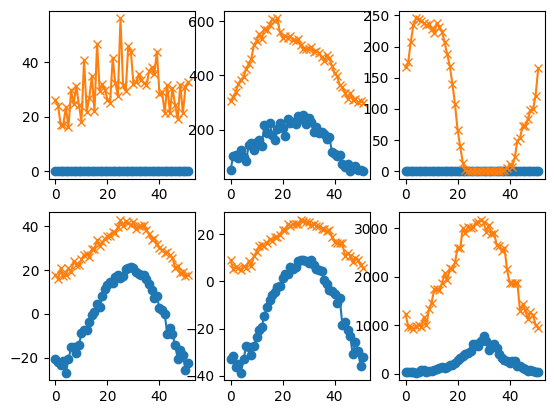

In [32]:
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots (2x3)
fig, ax = plt.subplots(2, 3)

# Plot data in each subplot
# ax[0, 0].plot([1, 2, 3], [1, 4, 9])
# ax[0, 1].plot([1, 2, 3], [1, 2, 3])
# ax[0, 2].plot([1, 2, 3], [3, 2, 1])
# ax[1, 0].plot([1, 2, 3], [9, 4, 1])
# ax[1, 1].plot([1, 2, 3], [5, 6, 7])
# ax[1, 2].plot([1, 2, 3], [7, 8, 9])

plot_the_weather_graph(X_tr, ax, 0, 0, 1)
plot_the_weather_graph(X_tr, ax, 0, 1, 2)
plot_the_weather_graph(X_tr, ax, 0, 2, 3)
plot_the_weather_graph(X_tr, ax, 1, 0, 4)
plot_the_weather_graph(X_tr, ax, 1, 1, 5)
plot_the_weather_graph(X_tr, ax, 1, 2, 6)


# Show the figure
plt.show()


/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Minimum value: nan
Maximum value: nan


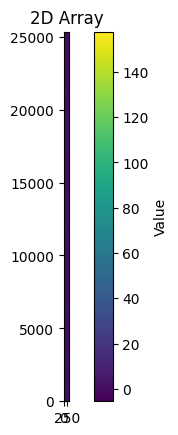

In [33]:
#### Data Preprocessing

# subtract mean and devide by standerd deviation
M = np.mean(X_tr, axis=0, keepdims=True)
S = np.std(X_tr, axis=0, keepdims=True)
X[:, 3:] = (X[:, 3:]-M)/S

# Find the minimum and maximum values
min_val = np.min(X[:, 3:])
max_val = np.max(X[:, 3:])

print("Minimum value:", min_val)
print("Maximum value:", max_val)

plt.imshow(X[:, 3:], cmap='viridis', origin='lower')
plt.colorbar(label='Value')
plt.title('2D Array')
plt.show()

weather Index:1, min values shape :(52,)
 weather Index:1, max values shape :(52,)
weather Index:2, min values shape :(52,)
 weather Index:2, max values shape :(52,)
weather Index:3, min values shape :(52,)
 weather Index:3, max values shape :(52,)
weather Index:4, min values shape :(52,)
 weather Index:4, max values shape :(52,)
weather Index:5, min values shape :(52,)
 weather Index:5, max values shape :(52,)
weather Index:6, min values shape :(52,)
 weather Index:6, max values shape :(52,)


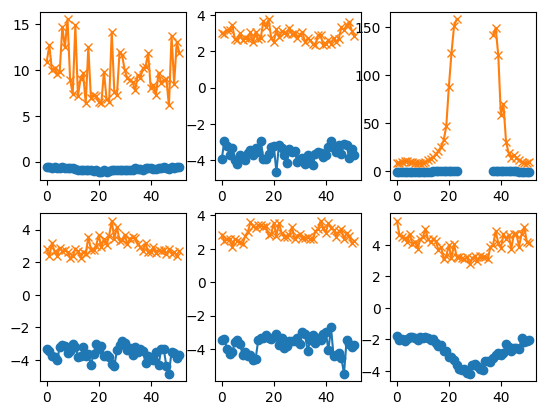

In [34]:
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots (2x3)
fig, ax = plt.subplots(2, 3)

# Plot data in each subplot
# ax[0, 0].plot([1, 2, 3], [1, 4, 9])
# ax[0, 1].plot([1, 2, 3], [1, 2, 3])
# ax[0, 2].plot([1, 2, 3], [3, 2, 1])
# ax[1, 0].plot([1, 2, 3], [9, 4, 1])
# ax[1, 1].plot([1, 2, 3], [5, 6, 7])
# ax[1, 2].plot([1, 2, 3], [7, 8, 9])

plot_the_weather_graph(X[:, 3:], ax, 0, 0, 1)
plot_the_weather_graph(X[:, 3:], ax, 0, 1, 2)
plot_the_weather_graph(X[:, 3:], ax, 0, 2, 3)
plot_the_weather_graph(X[:, 3:], ax, 1, 0, 4)
plot_the_weather_graph(X[:, 3:], ax, 1, 1, 5)
plot_the_weather_graph(X[:, 3:], ax, 1, 2, 6)


# Show the figure
plt.show()

In [45]:
# # Example plot for plotting the histogram
# import numpy as np
# import matplotlib.pyplot as plt

# # Sample NumPy array (you can replace this with your actual data)
# data = np.random.rand(100, 5)  # 100 data points, 5 features

# # Calculate correlation matrix
# correlation_matrix = np.corrcoef(data.T)  # Transpose for row-wise features

# # Create a new figure for plotting
# plt.figure(figsize=(8, 6))

# # Create heatmap with color-coded correlations
# plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)  # Adjust vmin/vmax for range

# # Add colorbar to interpret color intensity
# plt.colorbar()

# # Set labels for axes (optional, adjust based on your feature names)
# plt.xticks(np.arange(len(data.T)), ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"], rotation=45)
# plt.yticks(np.arange(len(data.T)), ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"])

# # Add title
# plt.title("Correlation Heatmap")

# # Display the plot
# plt.tight_layout()
# plt.show()


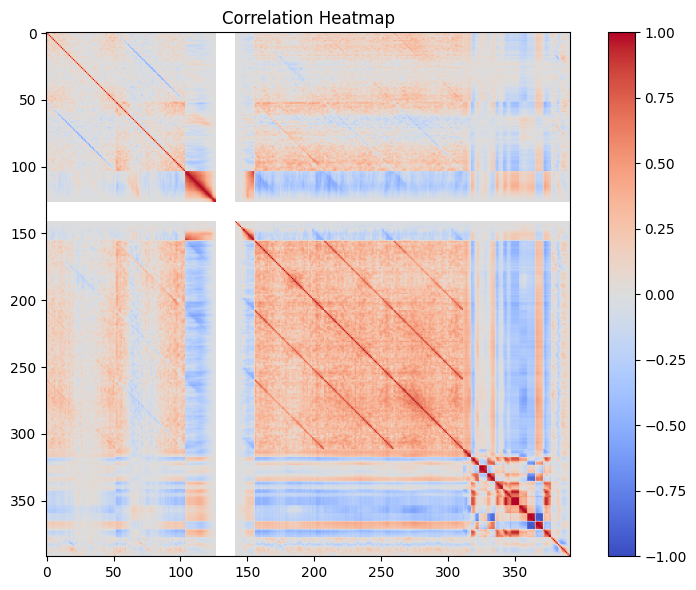

In [36]:
# Example plot for plotting the histogram
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = np.corrcoef(X[:, 3:].T)  # Transpose for row-wise features

# Create a new figure for plotting
plt.figure(figsize=(8, 6))

# Create heatmap with color-coded correlations
plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)  # Adjust vmin/vmax for range

# Add colorbar to interpret color intensity
plt.colorbar()

# Set labels for axes (optional, adjust based on your feature names)
# plt.xticks(np.arange(len(data.T)), ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"], rotation=45)
# plt.yticks(np.arange(len(data.T)), ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"])

# Add title
plt.title("Correlation Heatmap")

# Display the plot
plt.tight_layout()
plt.show()

## Apply the PCA Alogithm

Reference - https://towardsdatascience.com/pca-with-numpy-58917c1d0391

Computing the Eigenvectors and Eigenvalues

In [37]:
# Convert Nan to 0
# Convert nan to num 0
X = np.nan_to_num(X)

In [38]:
# Calculating the covariance matrix
covariance_matrix = np.cov(X[:, 3:].T)
print(covariance_matrix)
print(covariance_matrix.shape)


[[ 0.98656265  0.3610281   0.12707312 ... -0.01348047  0.03401224
   0.05942155]
 [ 0.3610281   1.00124679  0.14705532 ... -0.066788   -0.01434807
   0.00303108]
 [ 0.12707312  0.14705532  0.98567076 ... -0.07297058 -0.04160463
  -0.03446473]
 ...
 [-0.01348047 -0.066788   -0.07297058 ...  0.98250629  0.26673717
   0.01798986]
 [ 0.03401224 -0.01434807 -0.04160463 ...  0.26673717  0.98150511
   0.34377944]
 [ 0.05942155  0.00303108 -0.03446473 ...  0.01798986  0.34377944
   0.98147839]]
(392, 392)


In [39]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors, " | shape: ", eigen_vectors.shape,"\n")
print("Eigenvalues: \n", eigen_values, " | shape: ", eigen_values.shape, "\n")

Eigenvector: 
 [[-0.02475434+0.j -0.04242378+0.j -0.05953147+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.02357886+0.j -0.04101335+0.j -0.06509538+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.02923006+0.j -0.02515671+0.j -0.04389069+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [-0.01547723+0.j  0.00713017+0.j  0.00302983+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.00779213+0.j -0.01108737+0.j -0.00474907+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.00420337+0.j -0.01153143+0.j -0.00505878+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]]  | shape:  (392, 392) 

Eigenvalues: 
 [ 8.05885726e+01+0.00000000e+00j  1.89609739e+01+0.00000000e+00j
  1.64495930e+01+0.00000000e+00j  1.37791432e+01+0.00000000e+00j
  9.46128484e+00+0.00000000e+00j  8.79628334e+00+0.00000000e+00j
  8.17035870e+00+0.00000000e+00j  7.21843064e+00+0.00000000e+00j
  6.74649933e+00+0.00000000e+00j  6.48582409e+00+0

In [40]:
# Calculating the explained variance on each of components
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[(21.144959312268018+0j), (4.9750108297490865+0j), (4.316070661212215+0j), (3.6153937514176095+0j), (2.4824671356716674+0j), (2.3079829727333014+0j), (2.1437518590985887+0j), (1.893983441134879+0j), (1.7701573450018164+0j), (1.701760958151097+0j), (1.5933619023298016+0j), (1.5215189747788869+0j), (1.4897509686270622+0j), (1.444445064371212+0j), (1.3716116606202098+0j), (1.3350326348213393+0j), (1.2523535994902106+0j), (1.2240458386961692+0j), (1.150849661538658+0j), (1.1080167327840234+0j), (1.0687770020015066+0j), (1.0425935647846034+0j), (1.0224940873421553+0j), (0.9723500192455554+0j), (0.9643258354948572+0j), (0.893675305313708+0j), (0.8537836943612898+0j), (0.8424563028539521+0j), (0.8234900797757597+0j), (0.7964855649217709+0j), (0.7602564245118669+0j), (0.7423837547027611+0j), (0.7166486411645092+0j), (0.7040831901378558+0j), (0.6695514623731632+0j), (0.6517257033374185+0j), (0.6567704030197491+0j), (0.6244893094591739+0j), (0.5691219331407388+0j), (0.5614391016912819+0j), (0.55

In [41]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)


[ 21.14495931+0.00000000e+00j  26.11997014+0.00000000e+00j
  30.4360408 +0.00000000e+00j  34.05143455+0.00000000e+00j
  36.53390169+0.00000000e+00j  38.84188466+0.00000000e+00j
  40.98563652+0.00000000e+00j  42.87961996+0.00000000e+00j
  44.64977731+0.00000000e+00j  46.35153827+0.00000000e+00j
  47.94490017+0.00000000e+00j  49.46641914+0.00000000e+00j
  50.95617011+0.00000000e+00j  52.40061518+0.00000000e+00j
  53.77222684+0.00000000e+00j  55.10725947+0.00000000e+00j
  56.35961307+0.00000000e+00j  57.58365891+0.00000000e+00j
  58.73450857+0.00000000e+00j  59.8425253 +0.00000000e+00j
  60.91130231+0.00000000e+00j  61.95389587+0.00000000e+00j
  62.97638996+0.00000000e+00j  63.94873998+0.00000000e+00j
  64.91306581+0.00000000e+00j  65.80674112+0.00000000e+00j
  66.66052481+0.00000000e+00j  67.50298112+0.00000000e+00j
  68.3264712 +0.00000000e+00j  69.12295676+0.00000000e+00j
  69.88321319+0.00000000e+00j  70.62559694+0.00000000e+00j
  71.34224558+0.00000000e+00j  72.04632877+0.00000000e+0

So need to consider the total components that explain the around 95% of original data. 

Here we are considering first 50 components to represent the 80% of the dataset

In [42]:
# Using fifty first components (because those explain more than 95%)
projection_matrix = (eigen_vectors.T[:][:20]).T
print(projection_matrix)
print(projection_matrix.shape)


[[-2.47543430e-02+0.j -4.24237827e-02+0.j -5.95314673e-02+0.j ...
  -7.46753527e-02+0.j -3.44213785e-02+0.j -1.99402998e-02+0.j]
 [-2.35788629e-02+0.j -4.10133483e-02+0.j -6.50953829e-02+0.j ...
  -3.99104884e-02+0.j -4.12338053e-02+0.j -1.81119946e-02+0.j]
 [-2.92300585e-02+0.j -2.51567139e-02+0.j -4.38906902e-02+0.j ...
   1.77404385e-02+0.j  1.57250695e-01+0.j -9.35211316e-02+0.j]
 ...
 [-1.54772295e-02+0.j  7.13016776e-03+0.j  3.02983176e-03+0.j ...
   6.77584723e-03+0.j  1.50838113e-04+0.j  4.19967373e-02+0.j]
 [-7.79213215e-03+0.j -1.10873673e-02+0.j -4.74907365e-03+0.j ...
   3.64643514e-02+0.j -1.69169487e-02+0.j -3.31169959e-02+0.j]
 [-4.20337444e-03+0.j -1.15314263e-02+0.j -5.05877977e-03+0.j ...
   2.34135918e-02+0.j  1.56513892e-03+0.j -2.82755729e-02+0.j]]
(392, 20)


In [43]:
# Getting the product of original standardized X and the eigenvectors 
X_pca = X[:, 3:].dot(projection_matrix)
print(X_pca)
print("X_pca shape: ",X_pca.shape)
print("X_pca type", type(X_pca))

[[-6.9296961 +0.j -0.64004181+0.j  2.98530722+0.j ...  2.47882769+0.j
  -0.69592051+0.j -4.28850787+0.j]
 [-6.93084028+0.j -2.34728458+0.j  1.5544537 +0.j ...  0.63753346+0.j
  -0.6071633 +0.j -0.50579095+0.j]
 [-5.09605636+0.j -3.61594101+0.j -0.23084189+0.j ...  0.14206871+0.j
   0.04513472+0.j  0.64246864+0.j]
 ...
 [ 2.33442236+0.j  2.46801751+0.j  3.33664255+0.j ...  0.4012604 +0.j
  -0.13778995+0.j -1.81103099+0.j]
 [11.36662068+0.j  4.84596496+0.j  1.33780795+0.j ... -0.3643549 +0.j
   1.58912363+0.j  2.39667545+0.j]
 [ 5.64726277+0.j  9.31802228+0.j  4.54839938+0.j ... -2.3035178 +0.j
   0.83069774+0.j  1.07664016+0.j]]
X_pca shape:  (25345, 20)
X_pca type <class 'numpy.ndarray'>


Now Apply the correlation matrics

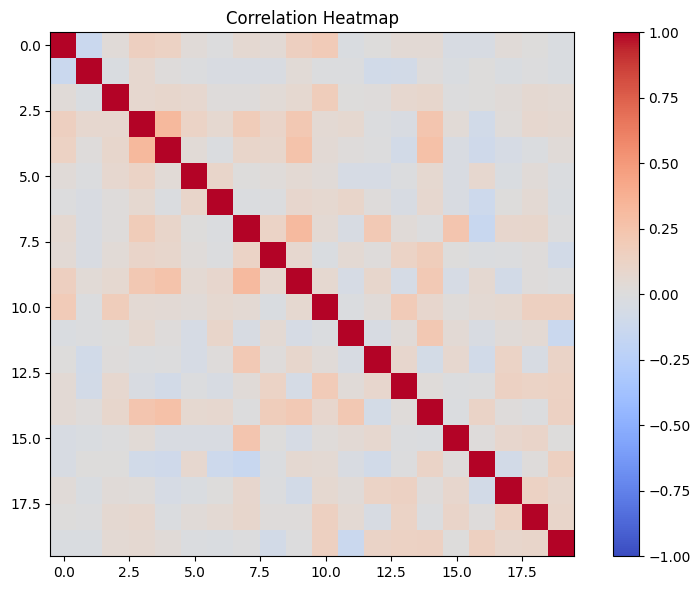

In [44]:
# Example plot for plotting the histogram
import numpy as np
import matplotlib.pyplot as plt

# Convert to float after taking absolute value (assuming real values needed)
float_data = np.abs(X_pca).astype(np.float32)  # Or np.float64


# Calculate correlation matrix
correlation_matrix = np.corrcoef(float_data.T)  # Transpose for row-wise features

# Create a new figure for plotting
plt.figure(figsize=(8, 6))

# Create heatmap with color-coded correlations
plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)  # Adjust vmin/vmax for range

# Add colorbar to interpret color intensity
plt.colorbar()

# Set labels for axes (optional, adjust based on your feature names)
# plt.xticks(np.arange(len(data.T)), ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"], rotation=45)
# plt.yticks(np.arange(len(data.T)), ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"])

# Add title
plt.title("Correlation Heatmap")

# Display the plot
plt.tight_layout()
plt.show()